## Neural Networks
## Solve MNIST classification with basic sklearn functions

The goal of this exercise is to familiarise you with working with datasets and transferring the MLP classification from the PRACTICE to one of the standard benchmark datasets: MNIST or fashion MNIST.

Note: The original [MNIST dataset](http://yann.lecun.com/exdb/mnist/) contains 28x28px images of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. *"If it doesn't work on **MNIST**, it won't work at all"*, they said. *"Well, if it does work on MNIST, it may still fail on others."*
A good alternative is using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) for the following reasons:
- MNIST is too easy. Convolutional nets can achieve 99.7% on MNIST (we will introduce this in the next lecture, thus, skip this for now). Classic machine learning algorithms can also achieve 97% easily.
- MNIST is overused.
- MNIST can not represent modern CV tasks.
Thus for your experiments, make your own choice after briefly looking into both.

For the hand-in, go through the following tasks and answer the following questions.

Tasks:
1. Search online about characteristics and usage of the MNIST and/or FashionMNIST data set
2. Build your own "data loader" to prepare training and test splits as well as input data and output labels.
3. Reproduce the steps in the PRACTICE of using the MLP function from sklearn to classify the data.
4. Understand and test what the respective loss function and optimisers are.
## Optional
5. Plot some training progress (e.g. plot the loss)
6. Have a brief (!) experiment with different settings for the hyperparameters: batch_size, learning_rate, hidden_layer_sizes.

Questions:
1. What is the best accuracy that you found?
2. What are good values of batch_size, learning_rate, hidden_layer_sizes?
3. What optimiser options did you choose (and why)?
4. What max_iter do you need to converge?
5. What did you observe in the results for good and bad hyperparameters?

In [9]:
from IPython.display import display
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import neural_network
from sklearn import preprocessing
import seaborn as sns

#### Load MNIST data
You may consider just using np.loadtxt on https://python-course.eu/data/mnist/mnist_train.csv and https://python-course.eu/data/mnist/mnist_test.csv

In [4]:
data = np.loadtxt("./data/mnist_train.csv", delimiter=',')
test_data = np.loadtxt("./data/mnist_test.csv", delimiter=',')

##### Consider some visualisations to get a feeling for the data set!

(60000, 785)


Text(0.5, 1.0, 'label: 5.0')

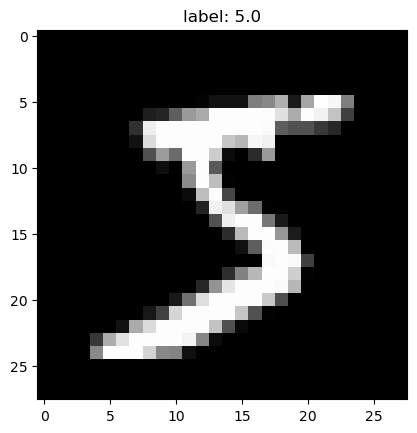

In [5]:
print(data.shape)
X = data[:, 1:]  # all rows, all columns except firs
y = data[:, 0]   # all rows, only first column
plt.imshow(X[0].reshape(28, 28), cmap="gray")
plt.title("label: " + str(y[0]))

#### Build the model

In [27]:
norm_X = preprocessing.normalize(X)

p_random_seed = 42

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    norm_X, y, test_size=0.2, random_state=p_random_seed)

# parameters for the MLP shape
hidden_layer_sizes = (128, 64)  # tuple of sizes of hidden layers
activation ='relu'  # activation_fkt, {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}

#parameters for the learning
optimiser = 'sgd'  # {‘lbfgs’, ‘sgd’, ‘adam’}
learning_rate_init = 0.1  # learning_rate, try something smaller first!
learning_rate = 'adaptive'  # learning_rate_type, {‘constant’, ‘invscaling’, ‘adaptive’}
max_iter = 200  # epoches, number of training interations
batch_size = 32  # number of training examples per epoch
momentum = 0.95  # [0,1]

clf_mlp = neural_network.MLPClassifier(
    random_state=p_random_seed, solver=optimiser, activation=activation,
    hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init,
    max_iter=max_iter, learning_rate=learning_rate, momentum=momentum,
    batch_size=batch_size, nesterovs_momentum=True, alpha=1e-05,
    beta_1=0.9, beta_2=0.999, epsilon=1e-08, early_stopping=False,
    n_iter_no_change=10, power_t=0.5, tol=0.0001, validation_fraction=0.1,
    shuffle=False, verbose=True, warm_start=False)

# X_train = pd.DataFrame(X_train)
# y_train = pd.DataFrame(y_train, columns=['label'])

print(X_train)
# X_train.join(y_train)

clf_mlp.fit(X_train, y_train)
test_accuracy = clf_mlp.score(X_test, y_test)
print("Prediction accuracy:", test_accuracy)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Iteration 1, loss = 0.36332734
Iteration 2, loss = 0.20159664
Iteration 3, loss = 0.16177402
Iteration 4, loss = 0.15164912
Iteration 5, loss = 0.13409115
Iteration 6, loss = 0.13445555
Iteration 7, loss = 0.12152444
Iteration 8, loss = 0.12061476
Iteration 9, loss = 0.10869316
Iteration 10, loss = 0.10698952
Iteration 11, loss = 0.10633172
Iteration 12, loss = 0.09738180
Iteration 13, loss = 0.09486890
Iteration 14, loss = 0.09988192
Iteration 15, loss = 0.09576139
Iteration 16, loss = 0.09529825
Iteration 17, loss = 0.08937447
Iteration 18, loss = 0.08952931
Iteration 19, loss = 0.09190110
Iteration 20, loss = 0.09245483
Iteration 21, loss = 0.09789183
Iteration 22, loss = 0.09230309
Iteration 23, loss = 0.08158919
Iteration 24, loss = 0.08064717
Iteration 25, loss = 0.09651442
Iteration 26, loss = 0.10520109
Iteration 27, loss = 

#### Show prediction and visualisation

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1175
         1.0       0.99      0.99      0.99      1322
         2.0       0.98      0.97      0.98      1174
         3.0       0.97      0.97      0.97      1219
         4.0       0.98      0.98      0.98      1176
         5.0       0.97      0.96      0.97      1104
         6.0       0.99      0.99      0.99      1177
         7.0       0.98      0.97      0.98      1299
         8.0       0.96      0.97      0.96      1160
         9.0       0.96      0.97      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



Text(50.722222222222214, 0.5, 'true label')

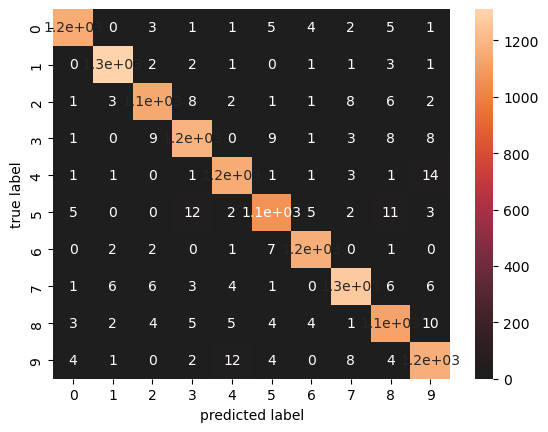

In [28]:
test_pred = clf_mlp.predict(X_test)
print(metrics.classification_report(y_test, test_pred))

confusion_matrix = metrics.confusion_matrix(y_test, test_pred)
plot_tree_cm = sns.heatmap(confusion_matrix, annot=True, center=0)
plot_tree_cm.set_xlabel('predicted label')
plot_tree_cm.set_ylabel('true label')